In [36]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def create_gauss_filter(h, w, k_size, sigma):

    filt = np.zeros((h, w))

    cx, cy = h//2, w//2

    for i in range(h):
        for j in range(w):
            dist = np.sqrt((i-cx)**2 + (j-cy)**2)
            filt[i,j] = np.exp(-dist**2 / (2*sigma**2))

    filt /= np.sum(filt)

    if k_size > h:
        filt = cv2.resize(filt, (k_size, k_size), interpolation=cv2.INTER_CUBIC)
        filt /= np.sum(filt)

    filt_fft = np.fft.fft2(filt)

    return filt, filt_fft


In [38]:
def apply_kernel_espectral(gray_image, filt, filt_fft):
    filtered_image_fft = np.fft.ifft2(np.fft.fft2(gray_image) * filt_fft)
    filtered_image = np.fft.ifftshift(np.real(filtered_image_fft))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()
    return filtered_image

In [39]:
def apply_kernel_convolucion(gray_image, filt, filt_fft):
    filtered_image = cv2.filter2D(gray_image, -1, filt)
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()
    return filtered_image

In [40]:
def plot_kernel(gray_image, k_size, sigma):
    h, w = gray_image.shape
    kernel, fourier = create_gauss_filter(h, w, k_size, sigma)
    plt.subplot(1, 2, 1)
    plt.plot(kernel)
    plt.subplot(1, 2, 2)
    plt.plot(fourier)
    plt.show()

/Users/federicotanzi/.conda/envs/vision_computadora_I/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


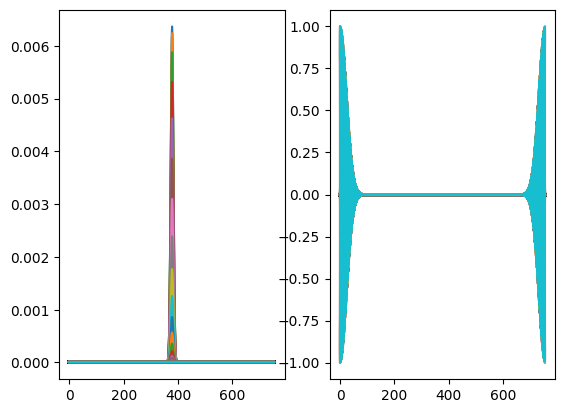

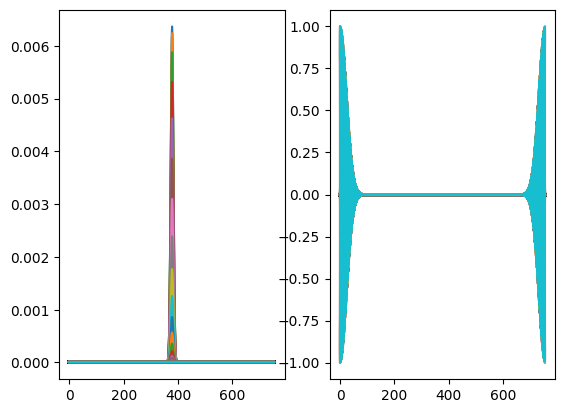

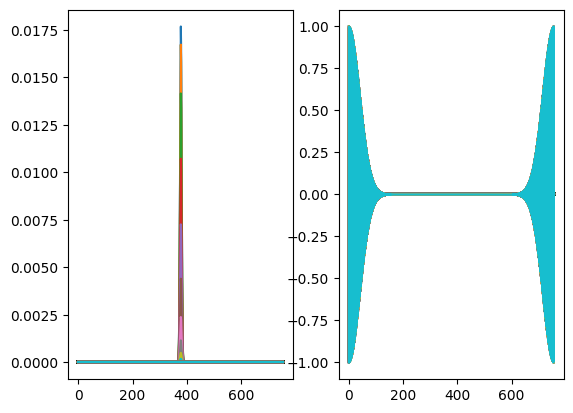

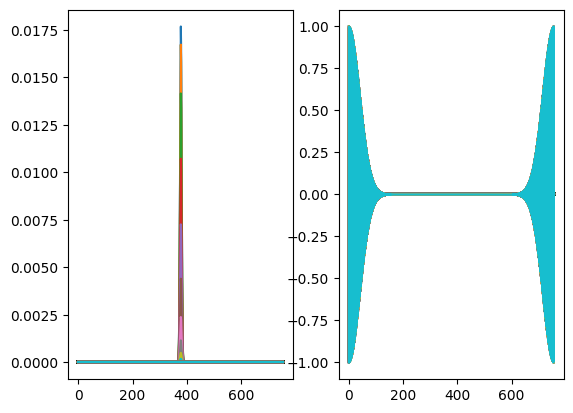

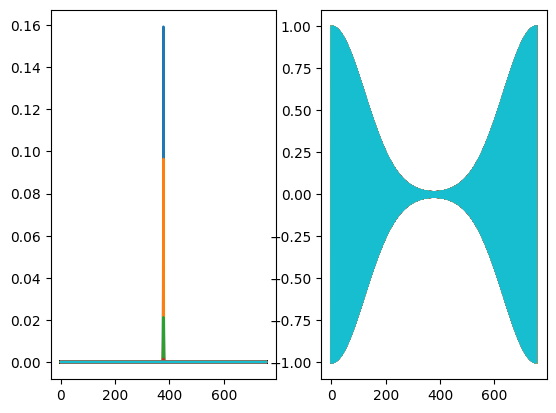

In [41]:
image_path = 'chewbacca.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plot_kernel(gray_image, 7, 5)
plot_kernel(gray_image, 5, 5)
plot_kernel(gray_image, 5, 3)
plot_kernel(gray_image, 3, 3)
plot_kernel(gray_image, 3, 1)

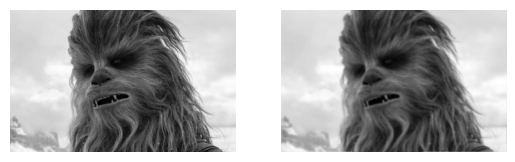

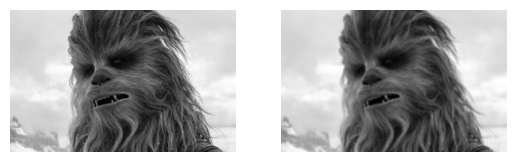

In [52]:
k_size = 7
sigma = 3
h, w = gray_image.shape
gauss_filt, gauss_filt_fft = create_gauss_filter(h, w, k_size, sigma)
espectral = apply_kernel_espectral(gray_image, gauss_filt, gauss_filt_fft)
convolucion = apply_kernel_convolucion(gray_image, gauss_filt, gauss_filt_fft)

In [53]:
def sharpness_measure(gray_image):

    fft = np.fft.fft2(gray_image)

    magnitude = np.abs(fft)

    mean = np.mean(magnitude)
    std_dev = np.std(magnitude)

    sharpness = std_dev / mean

    return sharpness

In [54]:
measure_convolucion = sharpness_measure(convolucion)
measure_espectral = sharpness_measure(espectral)
print(measure_convolucion)
print(measure_espectral)

61.74666155380654
80.65226760361921


In [55]:
# Tenengrad (GRA6)
def teng_measure(gray_image):
    gaussianX = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0)
    gaussianY = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0)
    return np.mean(gaussianX * gaussianX +
                      gaussianY * gaussianY)

In [56]:
measure_convolucion = teng_measure(convolucion)
measure_espectral = teng_measure(espectral)
print(measure_convolucion)
print(measure_espectral)

477.9291468253968
479.6942499020454
